# Assignment 3: Frequency Domain
Tổng quan: Ở bài tập này, chúng ta sẽ thực hành lập trình một số hàm xử lí ảnh cơ bản trong miền tần số
- Chuyển đổi giữa miền không gian và miền tần số
- Lọc trong miền tần số

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

## Sự khác biệt giữa miền không gian và miền tần số
Trong miền không gian, ta xử lý trực tiếp trên từng điểm ảnh, còn trong miền tần số, ta xử lý dựa trên tốc độ thay đổi giá trị ảnh trong miền không gian.
- Miền không gian: Ma trận ảnh đầu vào -> Xử lý -> Ma trận ảnh đầu ra
- Miền tần số: Ảnh vào -> Phân bố tần số -> Xử lý -> Chuyển đổi ngược -> Ảnh ra

Trong nhiều trường hợp, người ta dùng chuyển đổi Fourier để chuyển ảnh từ miền không gian sang miền tần số.

Một số hàm chuyển đổi và xử lý trong miền tần số:
- cv2.dft(): https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#gadd6cf9baf2b8b704a11b5f04aaf4f39d
- np.fft.fft2(): https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html
- np.fft.fftshift(): https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html
- cv2.cartToPolar(): https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#gac5f92f48ec32cacf5275969c33ee837d
- cv2.polarToCart(): https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga581ff9d44201de2dd1b40a50db93d665


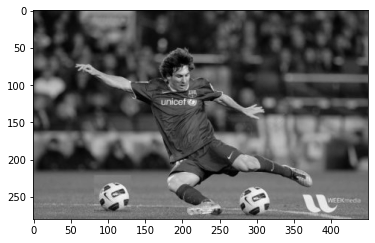

In [2]:
# read input as grayscale
img = cv2.imread('images/messi.jpg', 0)
plt.imshow(img, cmap='gray')
plt.show()

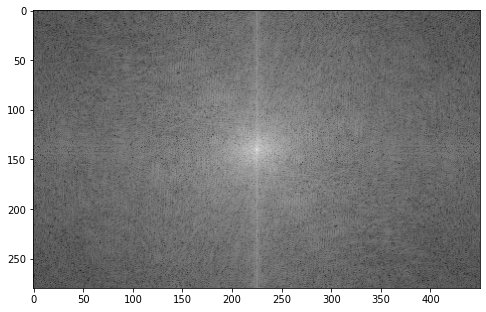

In [3]:
# convert image to floats and do dft saving as complex output
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)

# apply shift of origin from upper left corner to center of image
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
fig = plt.figure(figsize=(8,8))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

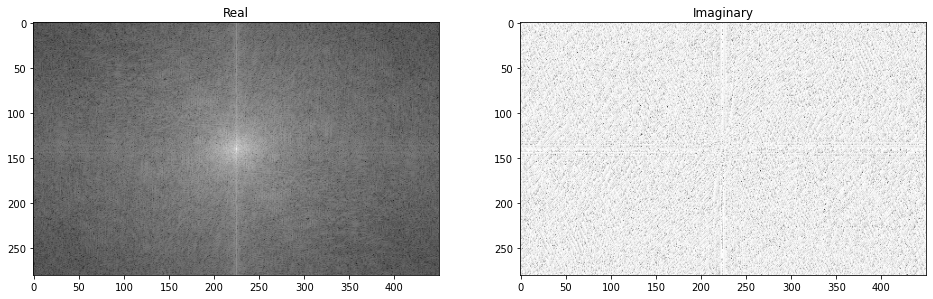

In [4]:
# display real and imaginary components
real, imag = cv2.cartToPolar(dft_shift[:,:,0],dft_shift[:,:,1])

real = np.log(real) / 30
imag = np.log(imag) / 30

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
ax1.title.set_text('Real')
plt.imshow(real, cmap='gray')
ax2 = fig.add_subplot(122)
ax2.title.set_text('Imaginary')
plt.imshow(imag, cmap='gray')
plt.show()

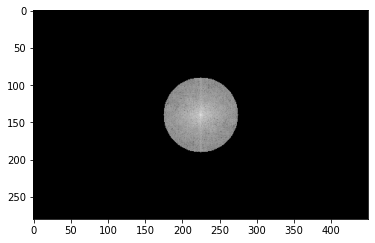

In [5]:
# low pass filter example
center = np.array(img.shape)/2
rad = 50
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if np.linalg.norm(np.array((i,j)) - center) > rad:
            magnitude_spectrum[i,j] = 0
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

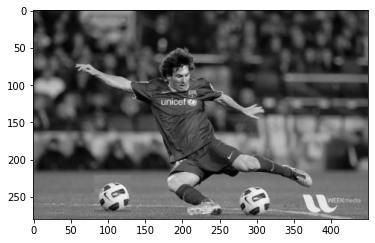

In [6]:
# shift origin from center to upper left corner
back_ishift = np.fft.ifftshift(dft_shift)

# do idft saving as complex output
img_back = cv2.idft(back_ishift)

# combine complex components into original image again
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

# re-normalize to 8-bits
img_back = cv2.normalize(img_back, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

plt.imshow(img_back, cmap='gray')
plt.show()

## Loại bỏ nhiễu sin (thủ công)

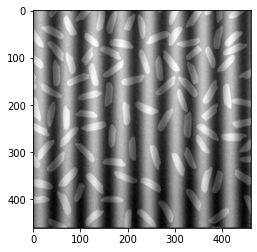

In [7]:
img = cv2.imread('images/gao.png',0)
plt.imshow(img, cmap = 'gray')
plt.show()

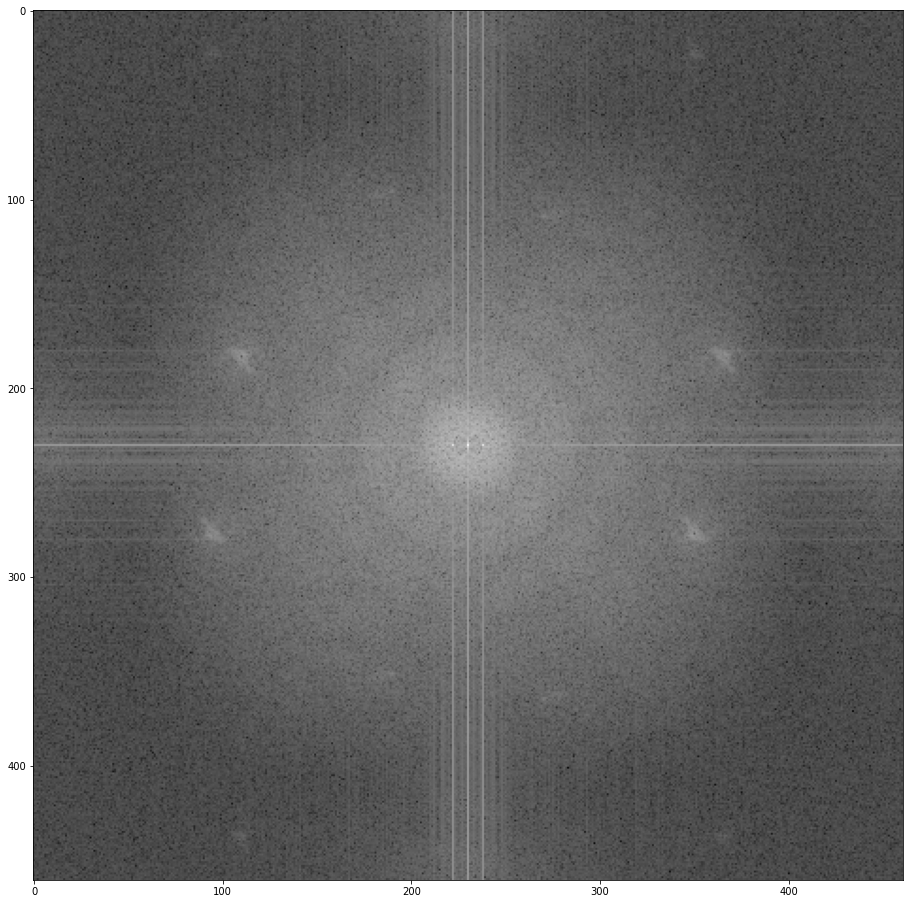

In [8]:
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.figure(figsize=(16,16))
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.show()

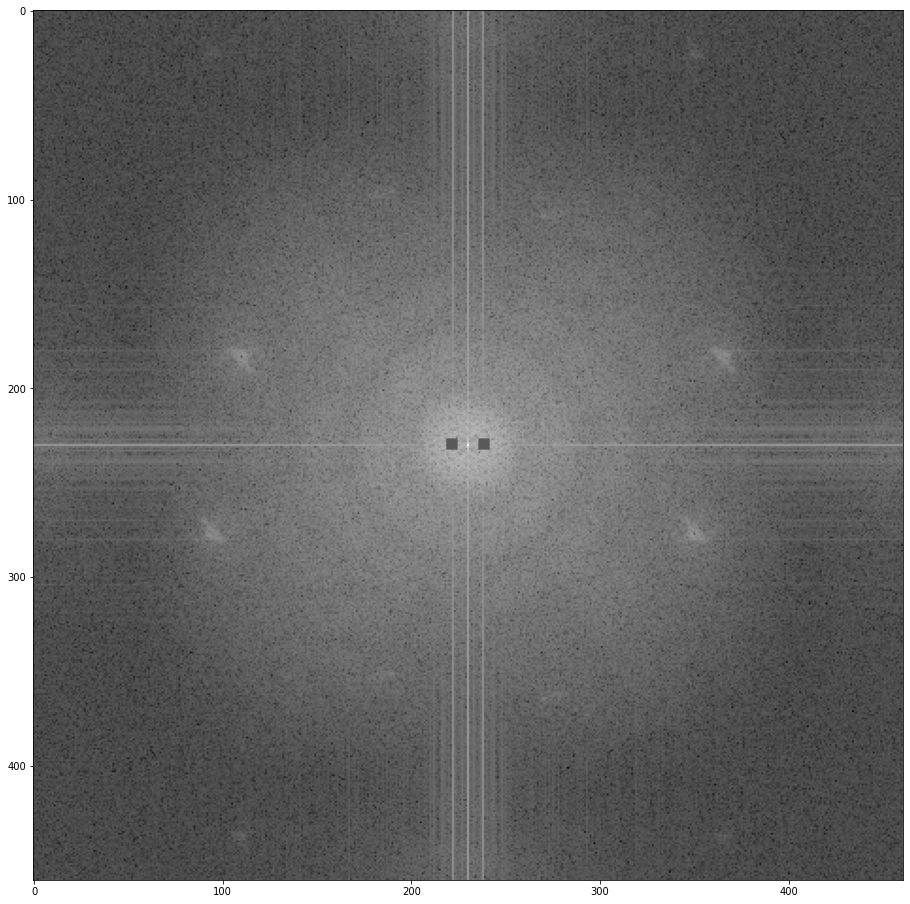

In [9]:
dft_shift[227:233, 236:242] = 255
dft_shift[227:233, 219:225] = 255
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.figure(figsize=(16,16))
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.show()

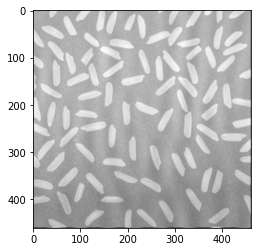

In [10]:
dft_ishift = np.fft.ifftshift(dft_shift)
idft = cv2.idft(dft_ishift)
img_back = cv2.magnitude(idft[:,:,0],idft[:,:,1])
plt.imshow(img_back, cmap = 'gray')
plt.show()

# Bài tập thực hành

## Các hàm được cung cấp

In [11]:
def get_ideal_low_pass_filter(shape, cutoff):
    """Computes a Ideal low pass mask
    takes as input:
    shape: the shape of the mask to be generated
    cutoff: the cutoff frequency of the ideal filter
    returns a ideal low pass mask"""

    d0 = cutoff
    rows, columns = shape
    mask = np.zeros((rows, columns), dtype=int)
    mid_R, mid_C = int(rows/2), int(columns/2)
    for i in range(rows):
        for j in range(columns):
            d = math.sqrt((i - mid_R)**2 + (j - mid_C)**2)
            if d <= d0:
                mask[i, j] = 1
            else:
                mask[i, j] = 0

    return mask

## Lọc thông thấp

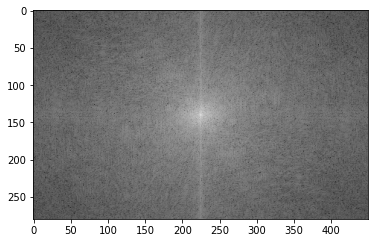

In [12]:
input_image = cv2.imread('images/messi.jpg', 0)

fft = np.fft.fft2(input_image)
shift_fft = np.fft.fftshift(fft)

# showing purpose only
mag_dft = np.log(np.abs(shift_fft))
plt.imshow(mag_dft, cmap='gray')
plt.show()

Yêu cầu:
- Lấy shape của ảnh đầu vào
- Lựa chọn cutoff
- Chuẩn bị bộ lọc mask (sử dụng hàm có sẵn ở trên)

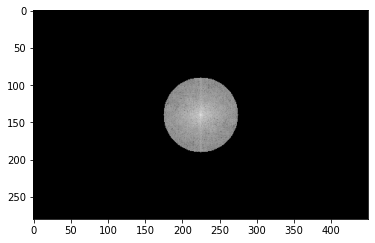

In [13]:
### YOUR CODE HERE ###
shape = np.shape(input_image)
cutoff = 50
mask = get_ideal_low_pass_filter(shape, cutoff)
### YOUR CODE HERE ###
filtered_image = np.multiply(mask, shift_fft)

# showing purpose only
mag_filtered_dft = np.log(np.abs(filtered_image)+1)
plt.imshow(mag_filtered_dft, cmap='gray')
plt.show()

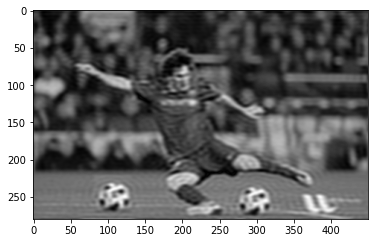

In [14]:
shift_ifft = np.fft.ifftshift(filtered_image)
ifft = np.fft.ifft2(shift_ifft)
mag = np.abs(ifft)
plt.imshow(mag, cmap='gray')
plt.show()

# Lọc thông cao

Yêu cầu: Hoàn thành hàm xây dựng bộ lọc thông cao và áp dụng vào ảnh

In [15]:
def get_ideal_high_pass_filter(shape, cutoff):
    """Computes a Ideal high pass mask
    takes as input:
    shape: the shape of the mask to be generated
    cutoff: the cutoff frequency of the ideal filter
    returns a ideal high pass mask"""

    ### YOUR CODE HERE ###
    d0 = cutoff
    rows, columns = shape
    mask = np.zeros((rows, columns), dtype=int)
    mid_R, mid_C = int(rows/2), int(columns/2)
    for i in range(rows):
        for j in range(columns):
            d = math.sqrt((i - mid_R)**2 + (j - mid_C)**2)
            if d >= d0:
                mask[i, j] = 1
            else:
                mask[i, j] = 0
    ### YOUR CODE HERE ###

    return mask

In [15]:
def get_ideal_high_pass_filter(shape, cutoff):
    """Computes a Ideal high pass mask
    takes as input:
    shape: the shape of the mask to be generated
    cutoff: the cutoff frequency of the ideal filter
    returns a ideal high pass mask"""

    # Hint: May be one can use the low pass filter function to get a high pass mask
    d0 = cutoff
    # rows, columns = shape
    # mask = np.zeros((rows, columns), dtype=int)
    mask = 1 - get_ideal_low_pass_filter(shape, d0)

    return mask

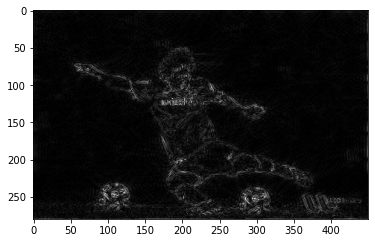

In [16]:
### YOUR CODE HERE ###
input_image = cv2.imread('images/messi.jpg', 0)

fft = np.fft.fft2(input_image)
shift_fft = np.fft.fftshift(fft)
shape = np.shape(input_image)

cutoff = 50
mask = get_ideal_high_pass_filter(shape, cutoff)
filtered_image = np.multiply(mask, shift_fft)
shift_ifft = np.fft.ifftshift(filtered_image)
ifft = np.fft.ifft2(shift_ifft)

# showing purpose only
mag = np.abs(ifft)
plt.imshow(mag, cmap='gray')
plt.show()

# Lọc theo đoạn

Yêu cầu: Hoàn thành hàm xây dựng bộ lọc theo đoạn và áp dụng vào ảnh

In [17]:
def get_ideal_band_pass_filter(shape, cutoff1, cutoff2):
    """Computes a Ideal band pass mask
    takes as input:
    shape: the shape of the mask to be generated
    cutoff1, cutoff2: the cutoff frequency of the ideal filter
    returns a ideal band pass mask"""

    ### YOUR CODE HERE ###
    rows, columns = shape
    mask = np.zeros((rows, columns), dtype=int)
    mid_R, mid_C = int(rows/2), int(columns/2)
    for i in range(rows):
        for j in range(columns):
            d = math.sqrt((i - mid_R)**2 + (j - mid_C)**2)
            if (d >= cutoff1) and (d <= cutoff2):
                mask[i, j] = 1
            else:
                mask[i, j] = 0
    ### YOUR CODE HERE ###

    return mask

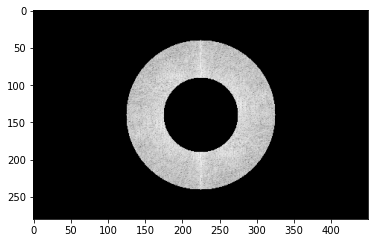

In [19]:
### YOUR CODE HERE ###
shape = np.shape(input_image)
mask = get_ideal_band_pass_filter(shape, cutoff1=50, cutoff2=100)
### YOUR CODE HERE ###
filtered_image = np.multiply(mask, shift_fft)

# showing purpose only
mag_filtered_dft = np.log(np.abs(filtered_image)+1)
plt.imshow(mag_filtered_dft, cmap='gray')
plt.show()

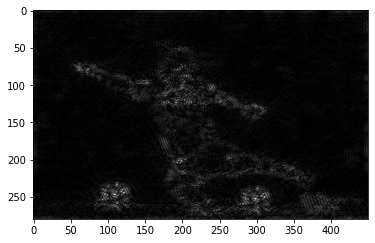

In [20]:
### YOUR CODE HERE ###
input_image = cv2.imread('images/messi.jpg', 0)

fft = np.fft.fft2(input_image)
shift_fft = np.fft.fftshift(fft)
shape = np.shape(input_image)

cutoff1 = 50
cutoff2 = 100
mask = get_ideal_band_pass_filter(shape, cutoff1, cutoff2)
filtered_image = np.multiply(mask, shift_fft)
shift_ifft = np.fft.ifftshift(filtered_image)
ifft = np.fft.ifft2(shift_ifft)

# showing purpose only
mag = np.abs(ifft)
plt.imshow(mag, cmap='gray')
plt.show()

## Lọc thông thấp với bộ lọc Gauss
Tạo mặt nạ để lọc thông thấp trong miền tần số có dạng hàm Gauss

Yêu cầu: Hoàn thành hàm xây dựng bộ lọc thông thấp với bộ lọc Gauss và áp dụng vào ảnh

$$\Large mask[i, j] = e^{-\frac{d^2}{2\times{d0^2}}}$$

In [21]:
def get_gaussian_low_pass_filter(shape, cutoff):
    """Computes a gaussian low pass mask
    takes as input:
    shape: the shape of the mask to be generated
    cutoff: the cutoff frequency of the gaussian filter (sigma)
    returns a gaussian low pass mask"""
    
    ### YOUR CODE HERE ###
    d0 = cutoff
    rows, columns = shape
    mask = np.zeros((rows, columns))
    mid_R, mid_C = int(rows / 2), int(columns / 2)
    for i in range(rows):
        for j in range(columns):
            d = math.sqrt((i - mid_R) ** 2 + (j - mid_C) ** 2)
            mask[i, j] = np.exp(-(d * d) / (2 * d0 * d0))
    ### YOUR CODE HERE ###

    return mask

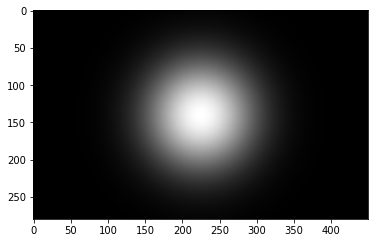

In [24]:
shape = np.shape(input_image)
mask = get_gaussian_low_pass_filter(shape, cutoff=50)
plt.imshow(mask, cmap='gray')
plt.show()

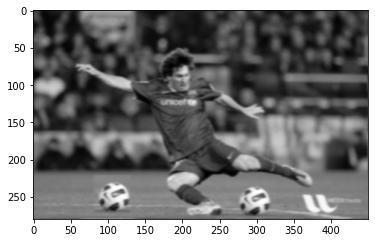

In [25]:
### YOUR CODE HERE ###
input_image = cv2.imread('images/messi.jpg', 0)

fft = np.fft.fft2(input_image)
shift_fft = np.fft.fftshift(fft)
shape = np.shape(input_image)

cutoff = 50
mask = get_gaussian_low_pass_filter(shape, cutoff)
filtered_image = np.multiply(mask, shift_fft)
shift_ifft = np.fft.ifftshift(filtered_image)
ifft = np.fft.ifft2(shift_ifft)

# showing purpose only
mag = np.abs(ifft)
plt.imshow(mag, cmap='gray')
plt.show()